We can start by importing our favourite package: ``elk``!

In [1]:
import elk
import numpy as np

%config InlineBackend.figure_format = "retina"

/Users/Tobin/opt/anaconda3/envs/elk/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/Tobin/.lightkurve/cache. Please move all the files in the legacy directory /Users/Tobin/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


## Lightcurve Setup

Now let's do a simple ensemble light curve fit to NGC~129

We just want a single light curve, and we don't care which sector it is from, so we will use the `just_one_lc` command

In [2]:
c = elk.ensemble.EnsembleLC(identifier='NGC 419',
                            location='23.58271, +61.1236',
                            radius=.046,
                            cluster_age=7.75,
                            cutout_size=99,
                            just_one_lc=True,
                            verbose=True)

In [3]:
c.lightcurves_summary_file()

NGC 419 has 4 observations
Starting Quality Tests for Observation: 0


100%|███████████| 9801/9801 [58:33<00:00,  2.79it/s]


  Passed Quality Tests 
Found a lightcurve that passed quality tests - exiting since `self.just_one_lc=True`


name,location,radius,log_age,has_data,n_obs,n_good_obs,which_sectors_good,n_failed_download,n_bad_quality,n_scatter_light,lc_lens
str7,str18,float64,float64,bool,int64,int64,int64[1],int64,int64,int64,int64[1]
NGC 419,"23.58271, +61.1236",0.046,7.75,True,4,1,18,0,0,0,1103


## Plotting the lightcurve itself

Let's quickly grab the 3rd lightcurve since that sector is usually looking lovely this time of year

In [6]:
lc = c.lcs[0]

The plotting of the lightcurve itself is rather straightforward!

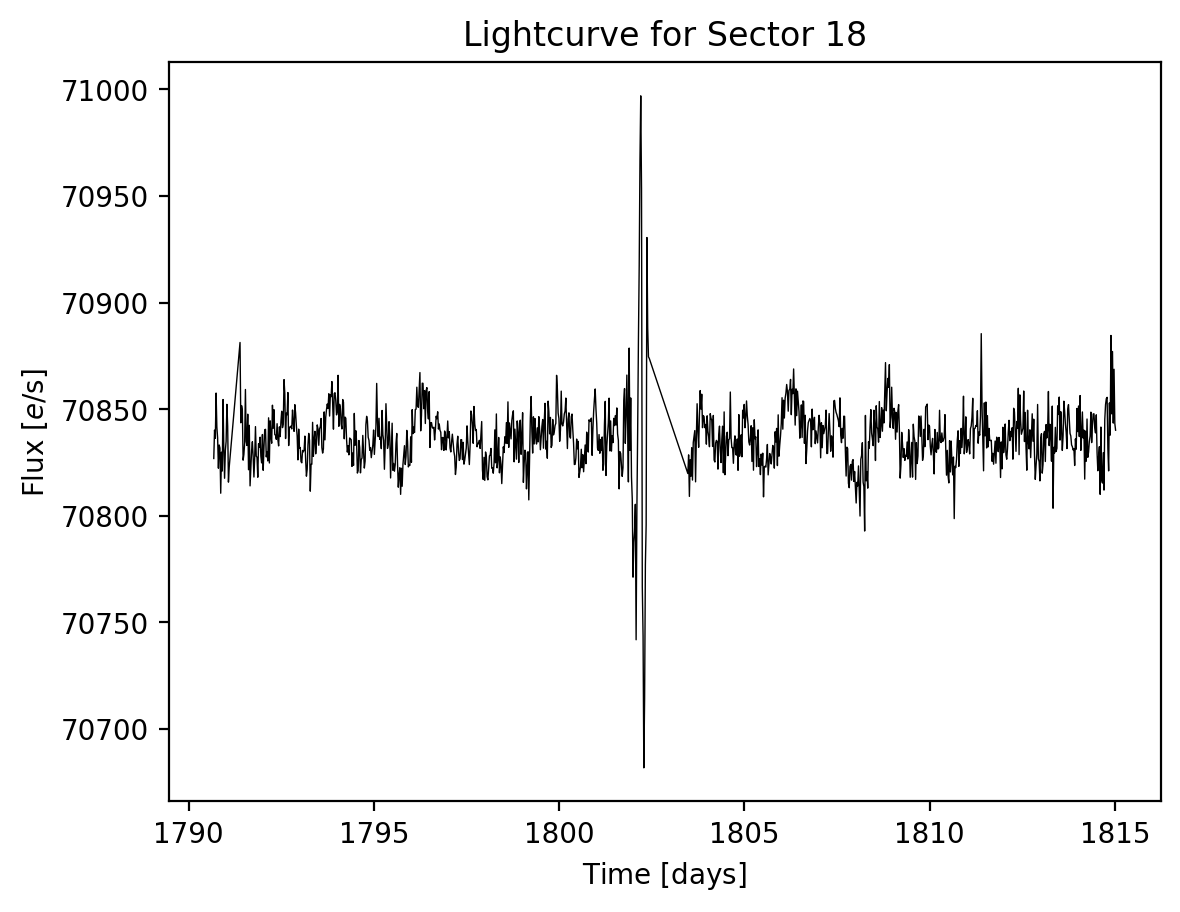

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Lightcurve for Sector 18'}, xlabel='Time $\\rm [days]$', ylabel='Flux $[e / {\\rm s}]$'>)

In [7]:
lc.plot()

Now lets plot the periodogram

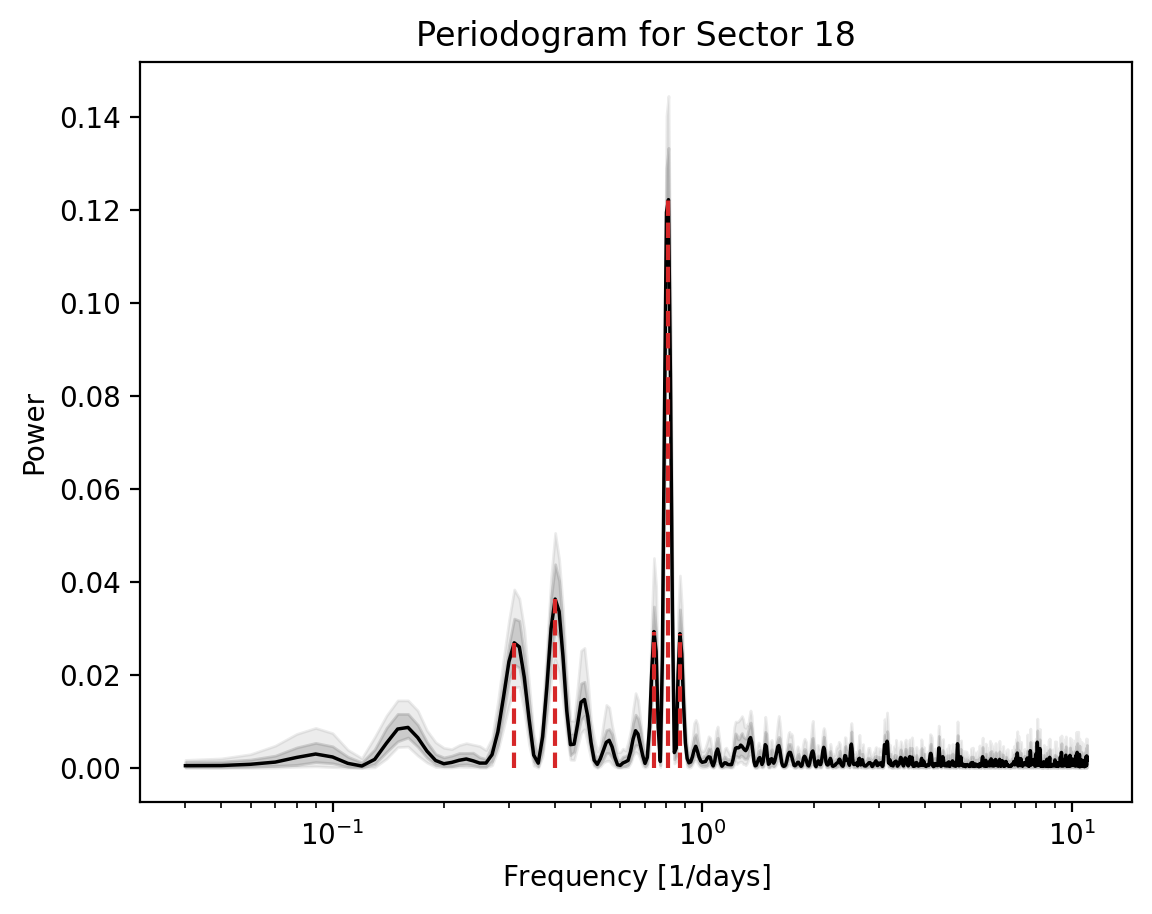

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Periodogram for Sector 18'}, xlabel='Frequency $[1 / {\\rm days}]$', ylabel='Power'>)

In [8]:
lc.plot_periodogram()

Ther are 5 peaks in this LSP. What are they?

In [24]:
lc.stats['peak_freqs'][:lc.stats['n_peaks']]

array([0.31, 0.4 , 0.74, 0.81, 0.87])

Now, lets investigate the spacial pixel map for this light curve, and look at which pixels in the aperature contribute powers to each peack.

We can do this by using the `lc.diagnose_lc_periodogram` function. We need to specify a path to put the gif frames, and the gif, and how we want to identttify this gif. 

The first index in the return is the gif itself, and the second index is a SIMBAD query for all the souces in the pixels for each peak. 

In [12]:
lc.diagnose_lc_periodogram(output_path='Corrected_LCs/', identifier='NGC 419')[0]

In [25]:
simbad_query=lc.diagnose_lc_periodogram(output_path='Corrected_LCs/', identifier='NGC 419')[1]

Lets try and look at the highet peak, the one at 0.81 days

In [34]:
simbad_query[3]

MAIN_ID,RA,DEC,V__vartyp,V__Vmax,V__R_Vmax,V__magtyp,V__UpVmin,V__Vmin,V__R_Vmin,V__UpPeriod,V__period,V__R_period,OTYPE,FLUX_V,peak_freq,peak_lower,peak_upper
,"""h:m:s""","""d:m:s""",,mag,,,,mag,,,day,,,mag,,,
str27,str13,str13,str16,float32,str1,str1,str1,float32,str1,str1,float64,str2,str6,float32,float64,float64,float64
Gaia DR3 509970402263876864,01 34 31.7910,+61 06 23.019,PULS,--,,G,,--,,,1.238034,,PulsV*,--,0.085,0.78,0.83


The peak has a frequency of 0.81 days, and there is a pulsating variable at that location coresponding to that peak with a period of 1.23 days$^{-1}$. Lets remember that frequency = 1/period, and 1/1.23 = 0.81, so it is very likely that this pulsating variable is the cause of the peak in the LSP

In [35]:
1/1.23

0.8130081300813008